In [1]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
print "Tensorflow Version:", tf.__version__

Tensorflow Version: 2.0.0


In [2]:
# Load Cifar-10 data
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.cifar10.load_data()
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
# Number of images in training set
print "There are", train_data.shape[0], "images in the training set"

# Number of images in testing set
print "There are", test_data.shape[0], "images in the testing set"

# Type of labeling that the data set is using
print "The label type is:", type(train_labels[0][0]), "ranging from",  min(train_labels), "to", max(train_labels)
print "Each integer stands for a class as shown \n"
for index, label in enumerate(class_labels):
    print "\t", index, ":", class_labels[index]

There are 50000 images in the training set
There are 10000 images in the testing set
The label type is: <type 'numpy.uint8'> ranging from [0] to [9]
Each integer stands for a class as shown 

	0 : airplane
	1 : automobile
	2 : bird
	3 : cat
	4 : deer
	5 : dog
	6 : frog
	7 : horse
	8 : ship
	9 : truck


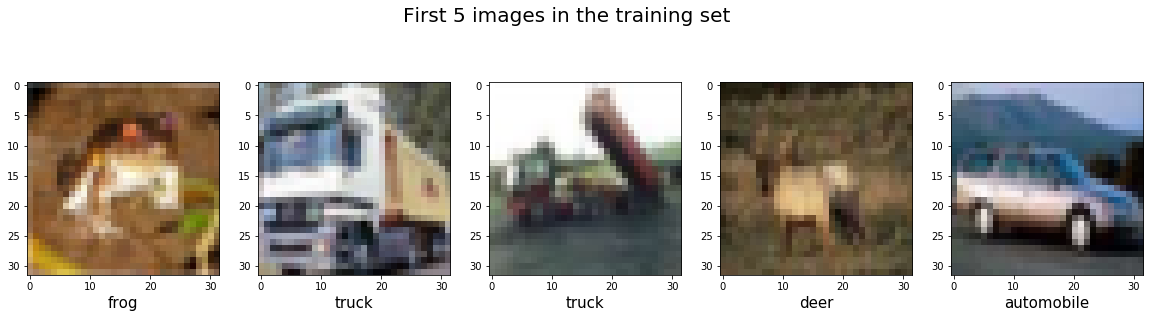

In [4]:
# Plotting first 5 training images
fig = plt.figure(figsize=(20, 5))
fig.suptitle('First 5 images in the training set', fontsize=20)
for i in range (5):
    fig.add_subplot(1, 5, i+1)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(class_labels[train_labels[i][0]], fontsize=15)

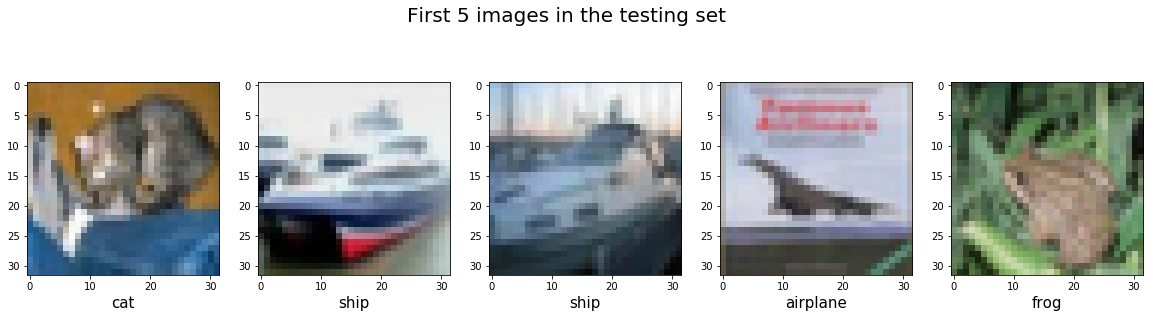

In [5]:
# Plotting first 5 testing images
fig = plt.figure(figsize=(20, 5))
fig.suptitle('First 5 images in the testing set', fontsize=20)
for i in range (5):
    fig.add_subplot(1, 5, i+1)
    plt.imshow(test_data[i], cmap=plt.cm.binary)
    plt.xlabel(class_labels[test_labels[i][0]], fontsize=15)

In [7]:
# Normalize all image pixels to the range of 0-1
train_data = train_data / 255.0
test_data = test_data / 255.0

In [ ]:
# Model definition
def build_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))
    model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))
    model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1024, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', #tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, name='sparse_categorical_crossentropy'), 
                  metrics=['accuracy'])

    return model

In [ ]:
# Build model
model = build_model()

# Summary of our model
model.summary()

In [ ]:
# Test model with first image in testing set

# Print predictions for each class
predictions = model.predict(np.expand_dims(test_data[0], axis = 0))
print "Predicted probability for each class:\n"
for class_label, prob in zip(class_labels, predictions[0]):
    print "\t", class_label, ":", prob

# Evaluated Cross Entropy Loss
print "\nEvaluating the model:"
sample_loss, sample_accuracy = model.evaluate(np.expand_dims(test_data[0], axis = 0), test_labels[0], verbose=1)
print "\nEvaluated Cross Entropy Loss =", sample_loss

# Calculated Cross Entropy Loss
cal_cel = -1 * math.log(predictions[0][test_labels[0]])
print "Calculated Cross Entropy Loss =", cal_cel

print "\nThe absolute difference between the evaluated and calculated CEL's =", abs(sample_loss - cal_cel)
print "Hence, they are approximately equal"

In [ ]:
# Train Model

# Get random training and validating data (4:1)
partial_train_data, val_data, partial_train_labels, val_labels = train_test_split(train_data, train_labels, 
                                                                                  test_size=0.2)

# Fit model
num_epochs = 20
history = model.fit(partial_train_data, partial_train_labels,
                    validation_data=(val_data, val_labels),
                    epochs=num_epochs, verbose = 1)

# Plotting Results
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

fig = plt.figure(figsize=(20, 5))
fig.add_subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
fig.add_subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
# Evaluate testing data
test_loss, test_accuracy = model.evaluate(test_data,  test_labels, verbose=2)
print "Test set loss =", test_loss
print "Test set accuracy =", test_accuracy

In [ ]:
# Evaluate model with first image in testing set, again
# Print predictions for each class
new_predictions = model.predict(np.expand_dims(test_data[0], axis = 0))
print "Predicted probability for each class, after fitting:\n"
for class_label, prob in zip(class_labels, new_predictions[0]):
    print "\t", class_label, ":", prob

# Evaluated Cross Entropy Loss
print "\nEvaluating the model:"
new_sample_loss, new_sample_accuracy = model.evaluate(np.expand_dims(test_data[0], axis = 0), test_labels[0], verbose=1)
print "\nEvaluated Cross Entropy Loss, after fitting =", new_sample_loss

# Calculated Cross Entropy Loss
new_cal_cel = -1 * math.log(new_predictions[0][test_labels[0]])
print "Calculated Cross Entropy Loss, after fitting =", new_cal_cel

print "\nThe new CEL (after fitting) =", new_sample_loss, "is much less than \nthe previous CEL (before fitting) =", sample_loss

In [ ]:
# Generating confusion table for model testing

# Initialize empty confusion matrix
confusion_matrix = np.zeros(shape=(len(class_labels), len(class_labels)), dtype=int)

# Get model predictions for test set
test_predictions = model.predict(test_data)
test_predictions_labels = np.zeros(shape=(test_labels.shape), dtype=int)
for index, prediction in enumerate(test_predictions):
     test_predictions_labels[index] = np.argmax(prediction)

# Update confusion matrix
for (i,j) in zip(test_labels, test_predictions_labels):
    confusion_matrix[int(i)][int(j)] += 1
    
# Print confusion table
print "\t\t\t\t\t\tConfusion Table\n\n\t  ",
for label in class_labels:
    print "%9s" % label,
print ""
for index, row in enumerate(confusion_matrix):
    print "\n", "%10s" % class_labels[index],
    for element in row:
        print "%9s" %element,

In [ ]:
# Getting filters of the first convolutional layer
filters, biases = model.layers[0].get_weights()

# Plotting the filters
fig = plt.figure(figsize=(20, 15))
fig.suptitle('Displaying the 16 trained filters in the first convolutional layer as images', fontsize=20)
for i in range (16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(filters[:, :, :, i])

In [ ]:
outputs = [layer.output for layer in model.layers]
active_func = tf.keras.backend.function([model.input], [outputs])
feature_maps = active_func(np.expand_dims(test_data[0], axis = 0))
# print(feature_maps[0][0][0].shape)

fig = plt.figure(figsize=(20, 15))
fig.suptitle('Displaying the 16 feature maps as images from the first convolutional layer generated for the first testing image', fontsize=20)
for i in range (16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(feature_maps[0][0][0][:, :, i], cmap ='gray')

In [ ]:
# Overfitting observation
print "Training on 100 images to observe overfitting"

# Build a new model
model = build_model()

# Get random training and validating data (4:1)
partial_train_data, val_data, partial_train_labels, val_labels = train_test_split(train_data, 
                                                                                  train_labels, 
                                                                                  test_size=0.2)
partial_train_data = partial_train_data[:100]
val_data = val_data[:20]
partial_train_labels = partial_train_labels[:100]
val_labels = val_labels[:20]


# Fit model
num_epochs = 30
history = model.fit(partial_train_data, partial_train_labels,
                    validation_data=(val_data, val_labels),
                    epochs=num_epochs, verbose = 1)

# Plotting Results
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

fig = plt.figure(figsize=(20, 5))
fig.suptitle('Results after training only 100 images', fontsize=20)
fig.add_subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
fig.add_subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
print "Acooring to the loss graph, it takes around 10 epochs to overfitting"

In [ ]:
# Adding dropout layers
def build_drop_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))
    model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))
    model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(1024, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', #tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, name='sparse_categorical_crossentropy'), 
                  metrics=['accuracy'])

    return model

num_epochs = 40

# Overfitting observation with dropout layer
print "Training on only 100 images to observe overfitting, with added dropout layers"
# Build a new model
model = build_drop_model()

# Fit model
history = model.fit(partial_train_data, partial_train_labels,
                    validation_data=(val_data, val_labels),
                    epochs=num_epochs, verbose = 0)

# Plotting Results
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

fig = plt.figure(figsize=(20, 5))
fig.suptitle('Results after training only 100 images, dropout rate = %.1f' %dropout_rate, fontsize=20)
fig.add_subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
fig.add_subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [9]:
# Model definition with dropout layers
def build_drop_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3), padding="same"))
#     model.add(tf.keras.layers.BatchNormalization())
#     model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding="same"))
    model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))
    model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding="same"))
#     model.add(tf.keras.layers.BatchNormalization())
#     model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding="same"))
    model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))
    model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(2048, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001, decay=0),#1e-6), 
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

    return model

# Get random training and validating data (4:1)
partial_train_data, val_data, partial_train_labels, val_labels = train_test_split(train_data, train_labels, 
                                                                                  test_size=0.2)
#
num_batch = 64
num_epochs = 20
model = build_drop_model()

# Fit model
history = model.fit(partial_train_data, partial_train_labels,
                    validation_data=(val_data, val_labels),
                    epochs=num_epochs, batch_size=num_batch, verbose = 1)

# Plotting Results
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

fig = plt.figure(figsize=(20, 5))
fig.add_subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
fig.add_subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 209s 5ms/sample - loss: 1.6057 - accuracy: 0.4665 - val_loss: 1.1734 - val_accuracy: 0.5748
Epoch 2/20
40000/40000 [==============================] - 199s 5ms/sample - loss: 1.0611 - accuracy: 0.6264 - val_loss: 1.2308 - val_accuracy: 0.5850
Epoch 3/20
 2304/40000 [>.............................] - ETA: 2:53 - loss: 0.8545 - accuracy: 0.6893

KeyboardInterrupt: 

In [ ]:
# Evaluate testing data
test_loss, test_accuracy = model.evaluate(test_data,  test_labels, verbose=2)
print "Test set loss =", test_loss
print "Test set accuracy =", test_accuracy

In [ ]:
# BEST MODEL SO FAR
# Model definition with dropout layers
def build_drop_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.BatchNormalization())
#     model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding="same"))
    model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding="same"))
    model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
#     model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding="same"))
    model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding="same"))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(2048, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001, decay=1e-6), 
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

    return model

# Get random training and validating data (4:1)
partial_train_data, val_data, partial_train_labels, val_labels = train_test_split(train_data, train_labels, 
                                                                                  test_size=0.2)
#
num_batch = 64
num_epochs = 20
model = build_drop_model()

# Fit model
history = model.fit(partial_train_data, partial_train_labels,
                    validation_data=(val_data, val_labels),
                    epochs=num_epochs, batch_size=num_batch, verbose = 1)

# Plotting Results
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

fig = plt.figure(figsize=(20, 5))
fig.add_subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
fig.add_subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
# Evaluate testing data
test_loss, test_accuracy = model.evaluate(test_data,  test_labels, verbose=2)
print "Test set loss =", test_loss
print "Test set accuracy =", test_accuracy